<a href="https://colab.research.google.com/github/aarna97pandey/MNIST-Classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import struct as st
import numpy as np 
import cv2

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

In [0]:
train_filename = {'images' : 'train-images.idx3-ubyte' ,'labels' : 'train-labels.idx1-ubyte'}
train_imagesfile = open('/content/gdrive/My Drive/Colab Notebooks/'+train_filename['images'],'rb')

In [0]:
train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))

nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column
images_array = np.zeros((nImg,nR,nC))
nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
images_array = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))
images_array = np.array(images_array) 

In [6]:
train_labels = open('/content/gdrive/My Drive/Colab Notebooks/'+train_filename['labels'],'rb')
magic, num = st.unpack(">II", train_labels.read(8))
labels = np.fromfile(train_labels, dtype=np.int8)
#labels = labels.reshape(labels.shape[0], 1)
#labels = np.reshape(labels, (np.product(labels.shape, 1)))
print(labels.shape)

(60000,)


In [0]:
x_train = images_array
y_train = labels

5

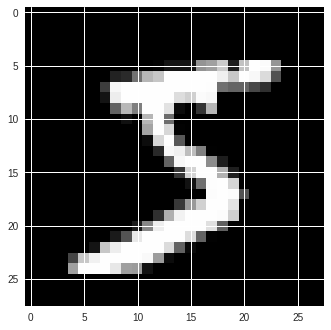

In [8]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(x_train[0])
x_train[0].shape
y_train[0]


In [9]:
x_train = x_train.reshape(images_array.shape[0],images_array.shape[1]*images_array.shape[2])
x_train.shape

(60000, 784)

In [10]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
test_filename = {'images' : 't10k-images.idx3-ubyte' ,'labels' : 't10k-labels.idx1-ubyte'}
test_imagesfile = open('/content/gdrive/My Drive/Colab Notebooks/'+test_filename['images'],'rb')


In [0]:
# test dataset preprocessing
test_imagesfile.seek(0)
magic = st.unpack('>4B',test_imagesfile.read(4))

nImg_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of images
nR_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC_test = st.unpack('>I',test_imagesfile.read(4))[0] #num of column
images_array_test = np.zeros((nImg_test,nR_test,nC_test))
nBytesTotal = nImg_test*nR_test*nC_test*1 #since each pixel data is 1 byte
images_array_test = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,test_imagesfile.read(nBytesTotal))).reshape((nImg_test,nR_test,nC_test))
images_array_test = np.array(images_array_test) 

In [13]:
test_labels = open('/content/gdrive/My Drive/Colab Notebooks/'+test_filename['labels'],'rb')
magic, num = st.unpack(">II", test_labels.read(8))
labels_test = np.fromfile(test_labels, dtype=np.int8)
#labels = labels.reshape(labels.shape[0], 1)
#labels = np.reshape(labels, (np.product(labels.shape, 1)))
print(labels.shape)

(60000,)


In [0]:
x_test = images_array_test
y_test = labels_test

7

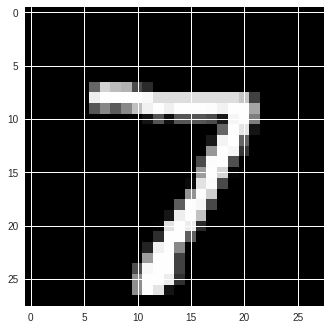

In [15]:
import matplotlib.pyplot as plt

#plot the first image in the dataset
plt.imshow(x_test[0])
x_test[0].shape
y_test[0]

In [16]:
x_test = x_test.reshape(images_array_test.shape[0],images_array_test.shape[1]*images_array_test.shape[2])
x_test.shape

(10000, 784)

In [0]:
y_pred = classifier.predict(x_test)


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [20]:
correct = 0
for i in range(10):
  correct = correct+cm[i][i]
print("% of accuracy = "+str(100*correct/len(y_test)))

% of accuracy = 96.88
